In [ ]:
#import all files to google colab - 
# you can either upload them (refer to collabInfo.png) to your google drive or just drag and drop them into the colab file explorer on the left side.
#dependent on my last push, it is possible that the packages: ipython, ipykernel, tornado, prompt-toolkit, pyzmq, pywin32, certifi,dateutil,debugpy,decorator,psutil are still listed. remove them.
#if using google drive, you will need to mount the drive and make sure that all file directories are correct.
#if something goes wrong and you cannot run the code, make sure to delete the session and start over again.
#it is normal, that there are some warnings when trying to install the packages, because in google colab, some packages are already installed.
#!pip install -r collab_requirements.txt

In [1]:
import llm as llModel
import json
from openai import OpenAI
from dotenv import load_dotenv
import os
import cardboardBox as cb
import media as md
from IPython.display import Image
import notebookFunctions as nbf


## Synthetic creation of data, by splitting a video into images and than creating imageSeries.
A better description of this process is found in the readme in "dataCreation"<br/>

In [ ]:
md.extractFramesFromVideo("dataCreation/2_eggs_1_yogurt.MP4")

Put some of the created Images to the folder ImageSeriesToUse

In [2]:

md.createImageSeries(reverse=True)

#### Display the story which tells us, what objects are Stored in the box. You can than compare if you come to the same conclusion as the model does.
Because each image sent to OpenAi costs some money, try to keep the images array small. Thank you:)

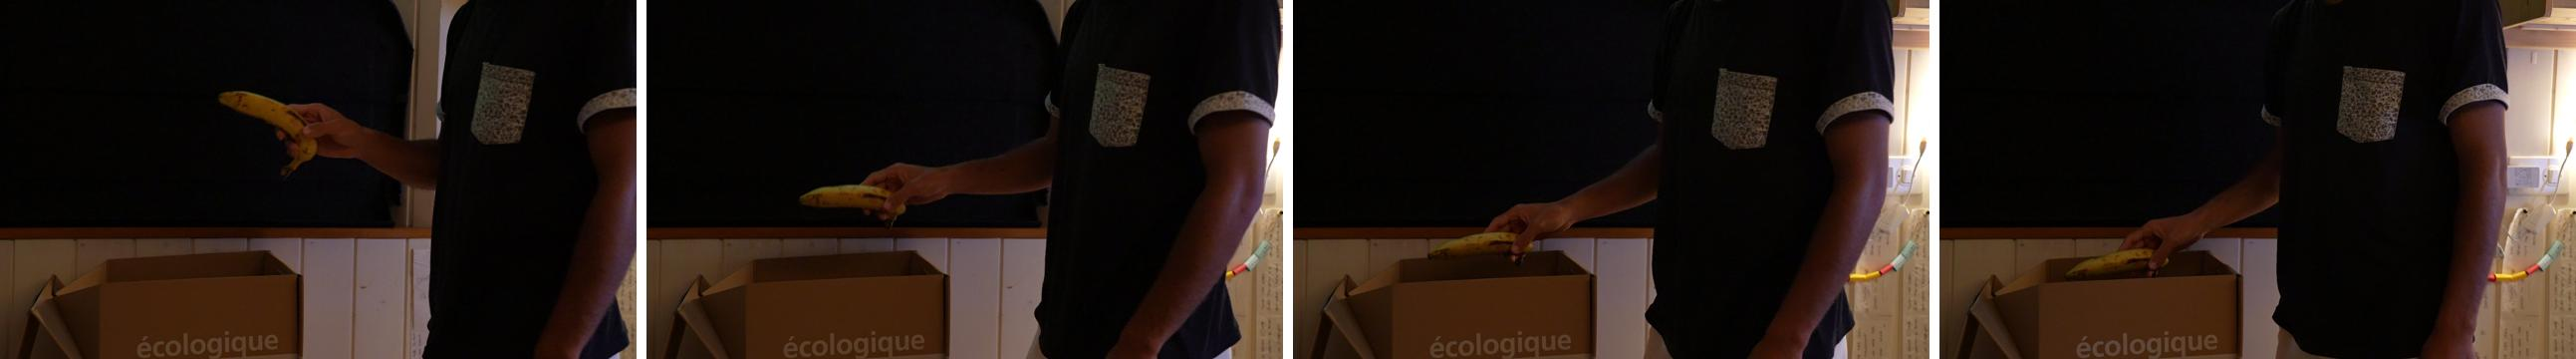

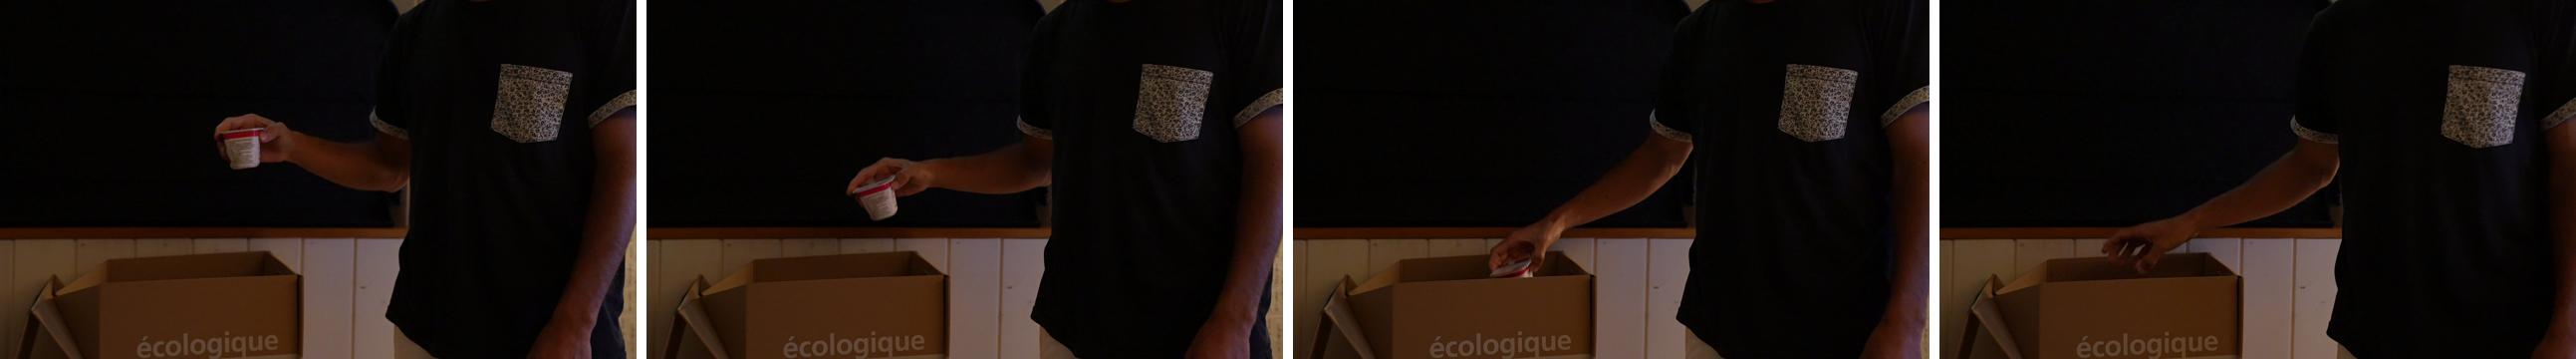

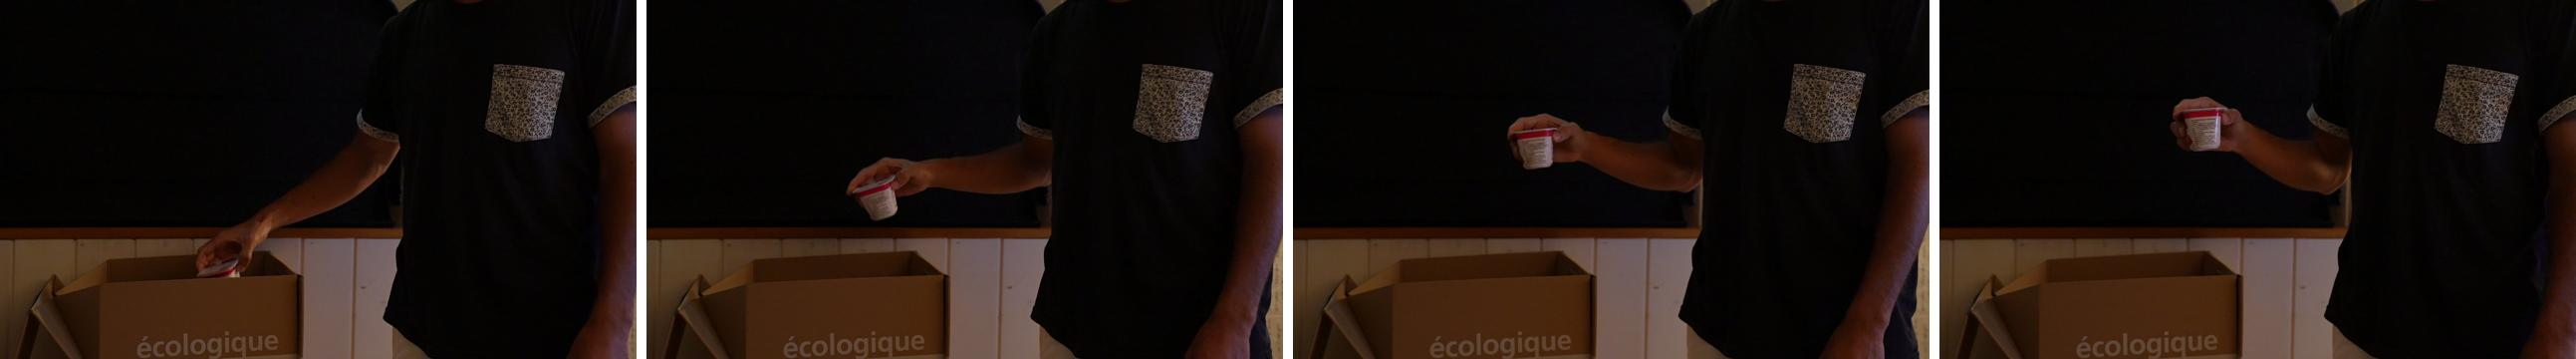

In [2]:
nbf.showTrainingImages()
images = md.getTrainingImages(toBase64=False)

### Lets loop through all of our imageSeries and let the model guess the cardboads contents

In [3]:
responses = nbf.guessCardboardBoxContent(images, resetCardboardBox = True)

## Interpretation and measurement by humans
When printing the results you can see in the first line how the model interprets the images, by calling cb.getCardboardBoxContents() we can see the actual cardboxes contents resulting from the generated answers.

In [4]:
print(responses)
print(cb.getCardboardBoxContents())

[{'objects': [{'name': 'banana', 'quantity': '1'}]}, {'objects': [{'name': 'banana', 'quantity': '1'}, {'name': 'yogurt cup', 'quantity': '1'}]}, {'objects': [{'name': 'banana', 'quantity': '1'}, {'name': 'yogurt cup', 'quantity': '0'}]}]
{'objects': [{'name': 'banana', 'quantity': '1'}, {'name': 'yogurt cup', 'quantity': '0'}]}


### These were the results based on this series:
model generated answers:
[<br/>{'objects': [{'name': 'banana', 'quantity': '1'}]}, <br/>{'objects': [{'name': 'banana', 'quantity': '1'}, {'name': 'yogurt cup', 'quantity': '1'}]}, <br/>{'objects': [{'name': 'banana', 'quantity': '1'}, {'name': 'yogurt cup', 'quantity': '0'}]}<br/>]<br/>
#### calculated cardbox contents:
{'objects': [{'name': 'banana', 'quantity': '1'}, {'name': 'yogurt cup', 'quantity': '0'}]}<br/>
imgeSeries used:
![alt text](results/imageSeries62.jpg)![alt text](results/imageSeries88.jpg)![alt text](results/z.jpg)

### Interpretation
Okay so these results seem to be sufficient. While implementing the model sometimes predicted the yogurt(which is actually a curd - but fair enough) to be a cup or a cup of coffee. This was due to the resolution provided by the image. I bumpt up de default resolution by a third of it's current size(639,360), which improved the prediction. Lets try the same with some other imageSeries.

Lets empty our cardbox first. The cardboard is inserted to prompt that is mapped to "oversee contents". You can see the prompts used in llm.py. If we do not empty the cardboard beforehand, the model will continue to track the items based on its last solution.

In [13]:
cb.setEmptyCardboardBox()
print(cb.getCardboardBoxContents())

{'objects': []}


Than we need to manually replace the imageSeries in the ImageSeriesToUse folder. You can see a better description how to create ImageSeries in the dataCreation/readme.md file. <br/><br/>
In my case, I will first delete all images in the subfolders of dataCreation, as well as all imageSeries in the folder ImageSeriesToUse. Than I record another video: products.MP4 and create images and imageSeries using the media.py file I implented. Than I will select the imageSeries I think suits the best for the next iteration, add them to the ImageSeriesToUse folder and rename them for ordering them into a possible storyline, where the cardboard is empty at the start.

In [4]:
md.extractFramesFromVideo("dataCreation/products.MP4")
md.createImageSeries()


write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True


I also create series of images in reverse order, that way I will have around double the amount of images and should be able to pass both actions to the model - independent of the actual actions provided by the video.


In [5]:
md.createImageSeries(reverse=True)

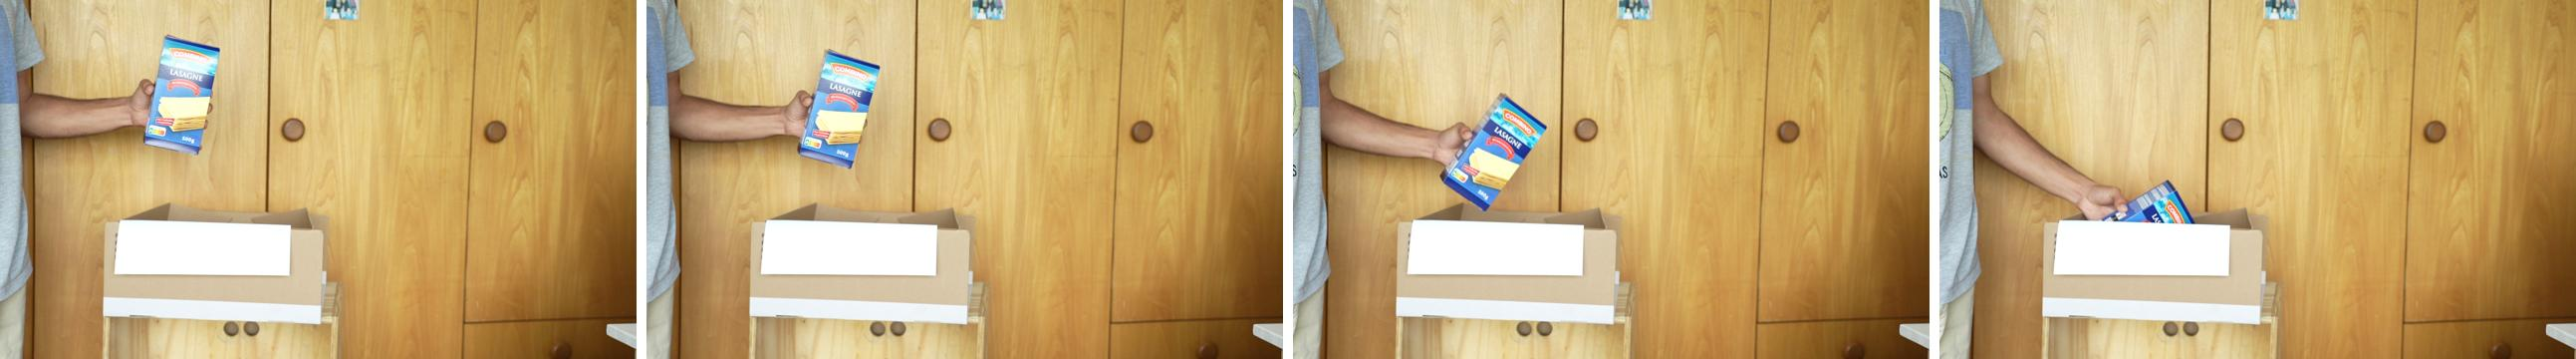

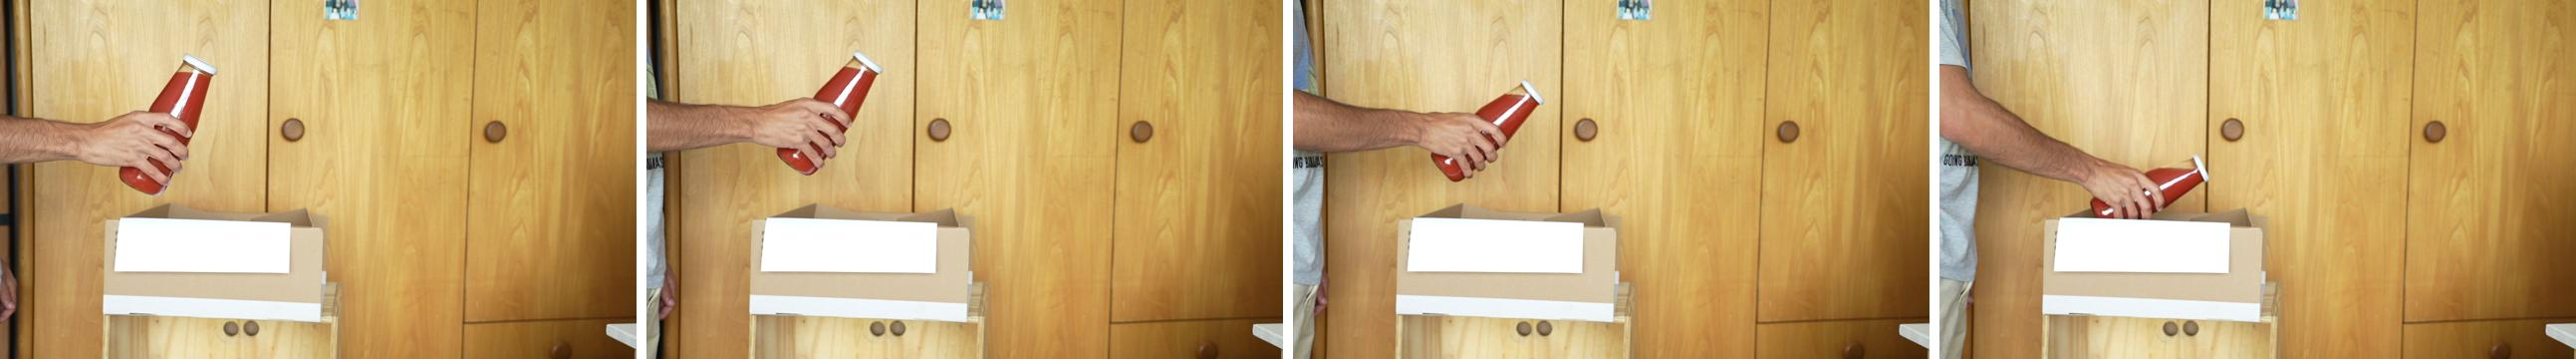

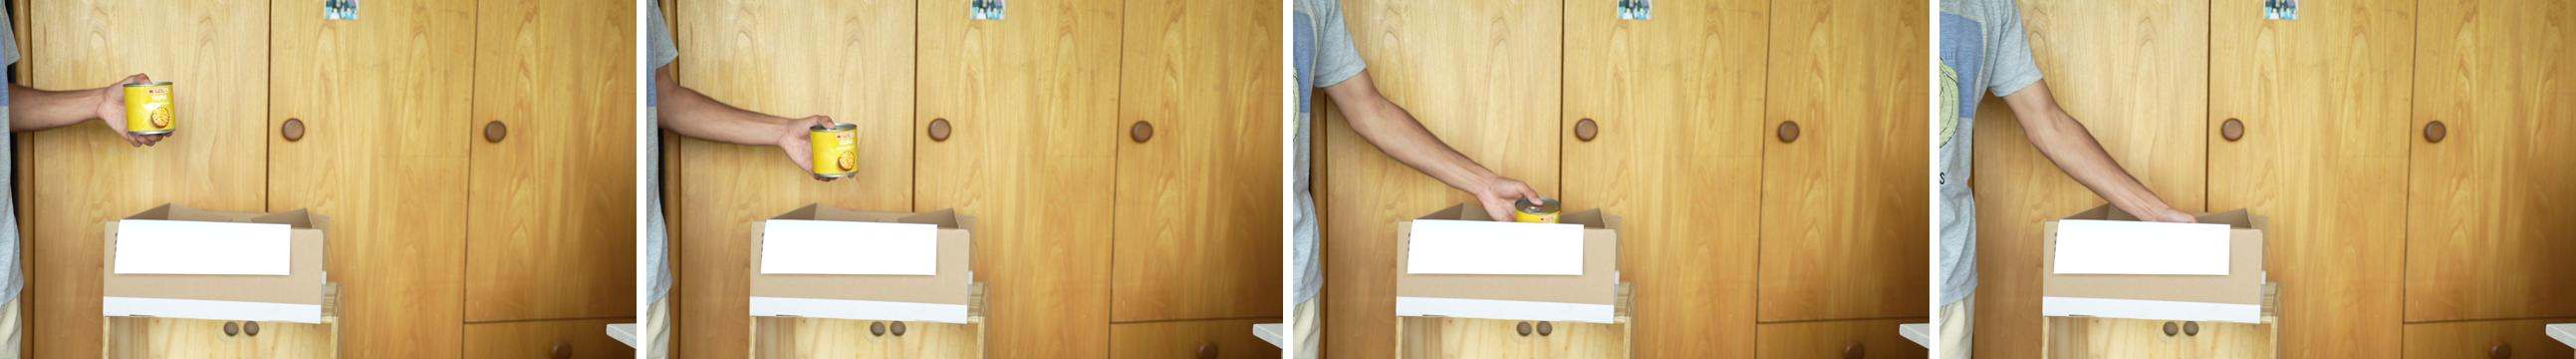

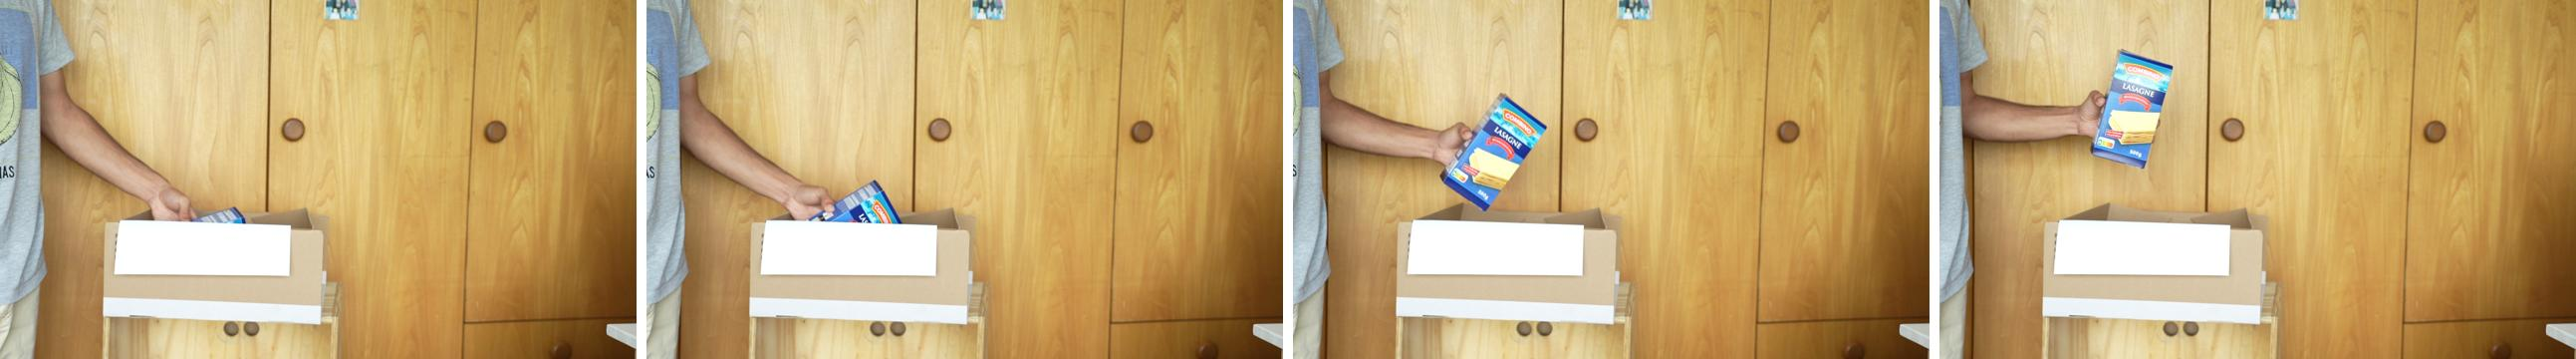

In [8]:
nbf.showTrainingImages()

In [9]:
responses = nbf.guessCardboardBoxContent(images, resetCardboardBox = True)

In [10]:
print(responses)
print(cb.getCardboardBoxContents())

[{'objects': [{'name': 'lasagna box', 'quantity': '1'}]}, {'objects': [{'name': 'lasagna box', 'quantity': '1'}, {'name': 'ketchup bottle', 'quantity': '1'}]}, {'objects': [{'name': 'lasagna box', 'quantity': '1'}, {'name': 'ketchup bottle', 'quantity': '1'}, {'name': 'canned peaches', 'quantity': '1'}]}, {'objects': [{'name': 'ketchup bottle', 'quantity': '1'}, {'name': 'canned peaches', 'quantity': '1'}]}]
{'objects': [{'name': 'ketchup bottle', 'quantity': '1'}, {'name': 'canned peaches', 'quantity': '1'}]}


## Results and Interpretation
The following was responded by the model:<br/>
[<br/>{'objects': [{'name': 'lasagna box', 'quantity': '1'}]}, <br/>{'objects': [{'name': 'lasagna box', 'quantity': '1'}, {'name': 'ketchup bottle', 'quantity': '1'}]},<br/> {'objects': [{'name': 'lasagna box', 'quantity': '1'}, {'name': 'ketchup bottle', 'quantity': '1'}, {'name': 'canned peaches', 'quantity': '1'}]}, {'objects': [{'name': 'ketchup bottle', 'quantity': '1'}, {'name': 'canned peaches', 'quantity': '1'}]}<br/>]<br/>
Which in conclusion means that we have the following items in our cardboard box:<br/>
{'objects': [<br/>{'name': 'ketchup bottle', 'quantity': '1'}, <br/>{'name': 'canned peaches', 'quantity': '1'}<br/>]}<br/>
Even this time the model predicted the actions right. However there was no caned peaches in the images provided, but caned corn. Maybe we have the same kind of problem as before, where the corn can is rather small and hard to distinguish from other objects. Bellow are the imageSeries I used this time: ![alt text](results/1.jpg) ![alt text](results/2.jpg) ![alt text](results/3.jpg) ![alt text](results/4.jpg)

### What about addition?
So far we only added one item, but what if we add multiple? will it still work? Let's first repeat the steps for creating new imageSeries.

In [14]:
md.extractFramesFromVideo("dataCreation/multiple.MP4")
md.createImageSeries()
md.createImageSeries(reverse=True)

c:\Users\OliBr\ZHAW_local\6. Semester\ml_2_project\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True
write a new image:  True


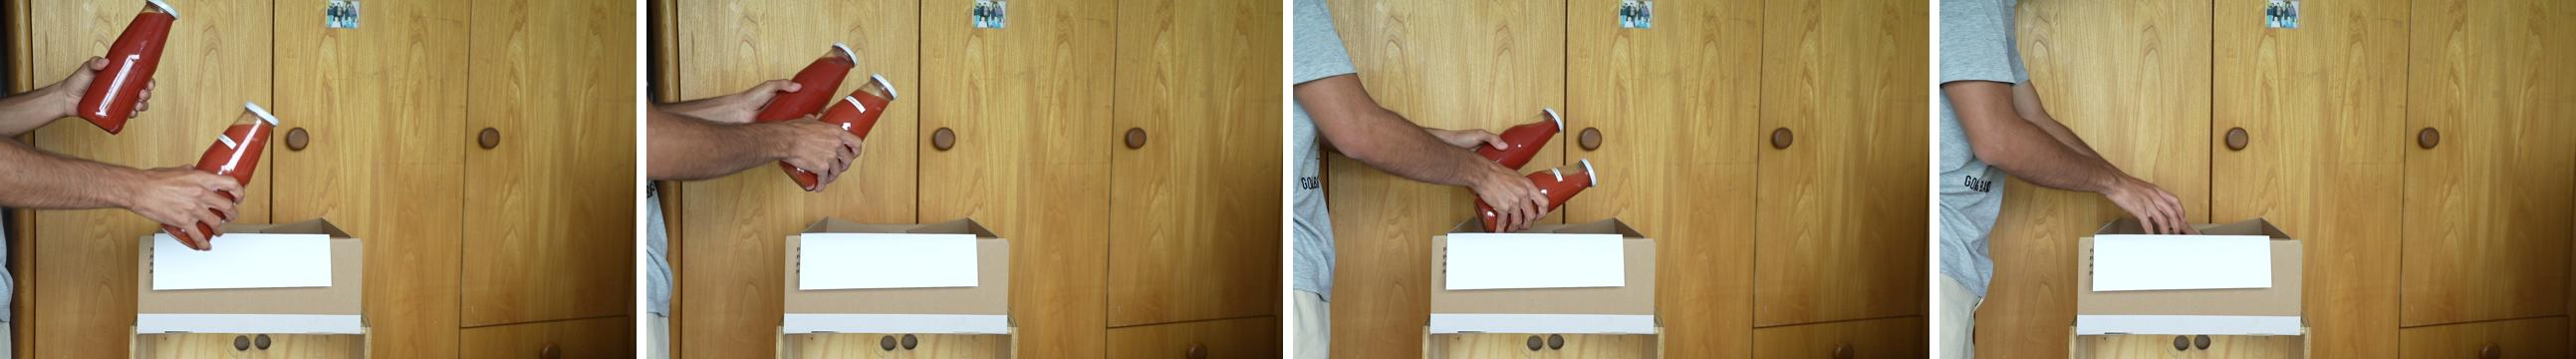

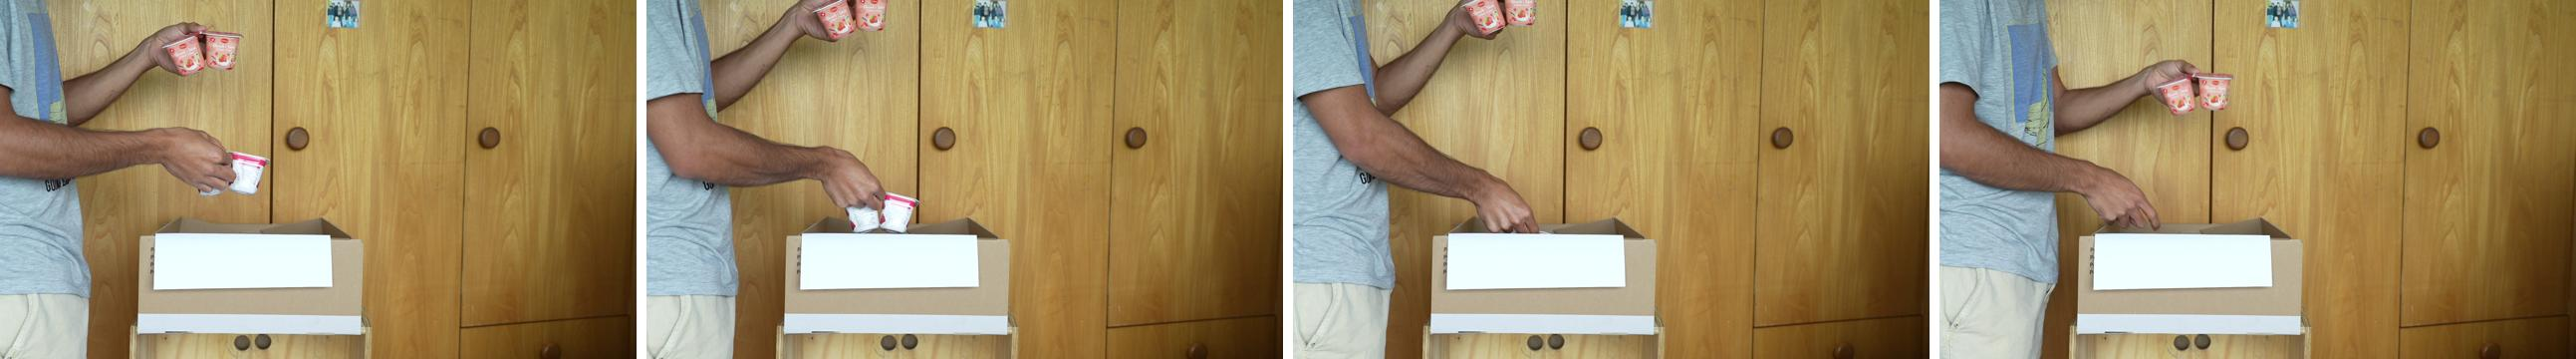

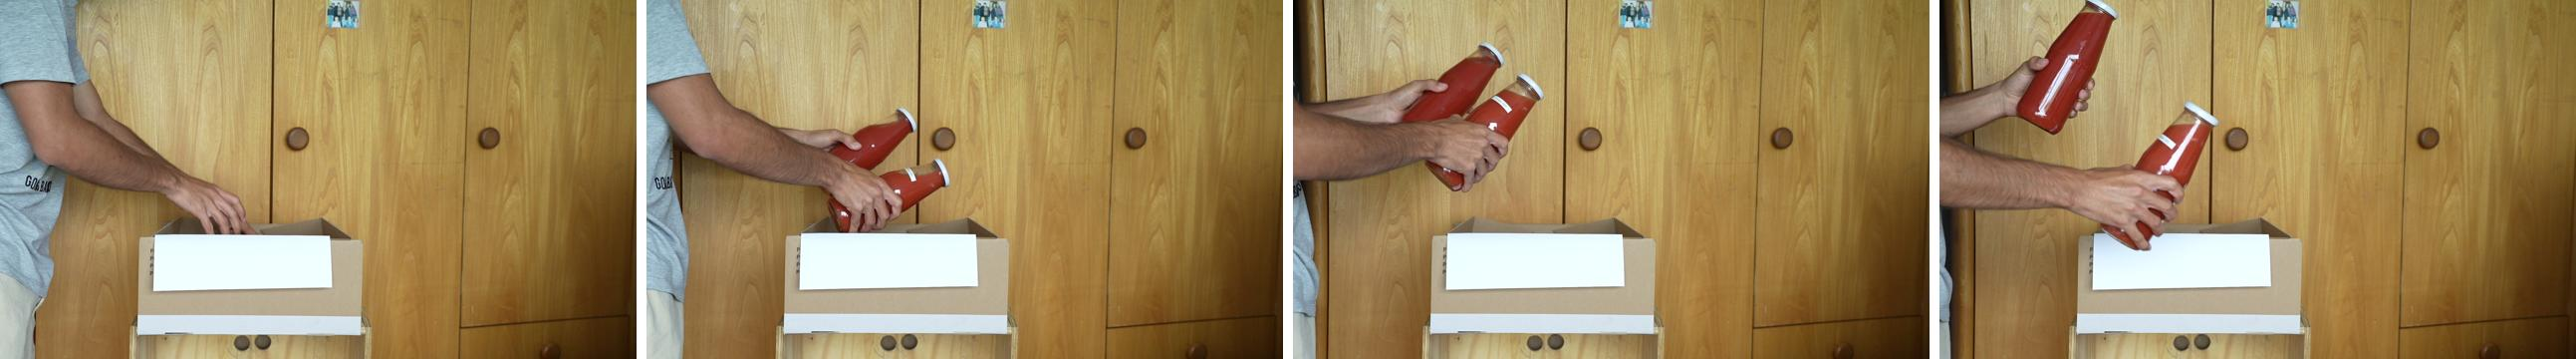

In [20]:
nbf.showTrainingImages()
images = md.getTrainingImages(toBase64=False)

Note this time, the second image is quite tricky and actually hard to predict. It is likely, that all four curds go into the box - but it's not guaranteed. Lets see what GPT thinks.

In [21]:
responses = nbf.guessCardboardBoxContent(images, resetCardboardBox = True)

In [22]:
print(responses)
print(cb.getCardboardBoxContents())

[{'objects': [{'name': 'bottle', 'quantity': '2'}]}, {'objects': [{'name': 'bottle', 'quantity': '2'}, {'name': 'yogurt', 'quantity': '2'}]}, {'objects': [{'name': 'bottle', 'quantity': '4'}, {'name': 'yogurt', 'quantity': '2'}]}]
{'objects': [{'name': 'bottle', 'quantity': '4'}, {'name': 'yogurt', 'quantity': '2'}]}


## Results and Interpretation
Note this time, the second image is quite tricky and actually hard to predict. It is likely, that all four curds go into the box - but it's not guaranteed. Lets see what GPT thinks.<br/>
Answers of GPT were:<br/>
[{'objects': [{'name': 'bottle', 'quantity': '2'}]}, {'objects': [{'name': 'bottle', 'quantity': '2'}, {'name': 'yogurt', 'quantity': '2'}]}, {'objects': [{'name': 'bottle', 'quantity': '4'}, {'name': 'yogurt', 'quantity': '2'}]}]<br/>
In conclusion:<br/>
{'objects': [{'name': 'bottle', 'quantity': '4'}, {'name': 'yogurt', 'quantity': '2'}]}<br/>
Well I did make a mistake while recording the video - does GPT think there are two pairs of yogurt inside or just two yogurts? What would your interpretation be?<br/>
About the bottles, I think the reason, why it did count four bottles, is the placement of the bottles in the last image. But its hard to tell. What do you think?<br/>
Also this time the labels of the bottles changed from ketchup bottle to bottle.<br/>
 ![alt text](results/imageSeries30.jpg) ![alt text](results/imageSeries35.jpg) ![alt text](results/imageSeries38.jpg)
## Conclusion
I tried a bunch of open source multimodals for this task. You can see some of the prompts I used for different models in the file prompts.txt. The results where not really usable. Of course they are by far not as large as GPT is and I had to use quantized versions of them, just to be able to run them locally. The only model that seemed okayish was idefics2-8b. However it was very slow and I couldn't really start it on collab. To conclud - Todays multimodals are able to predict putting in or taking out actions given a series of iamges. However the once used are not accurate enough for real life purposes.